In [103]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [104]:
img = cv2.imread('DATA/car_plate.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


In [105]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

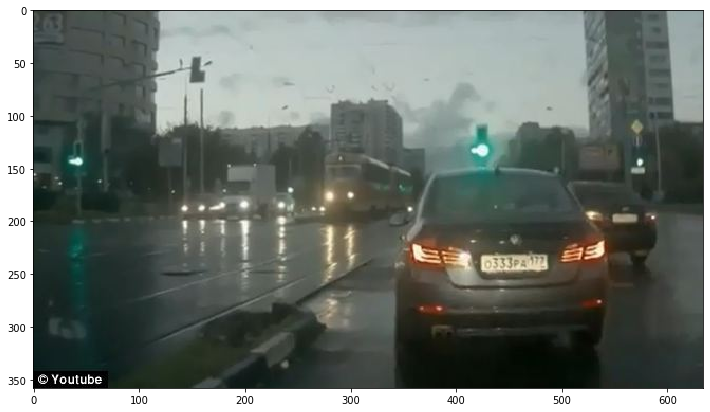

In [106]:
display(img)

In [107]:
license_plate = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_russian_plate_number.xml')

# Only Detecting the License PLate

In [108]:
def detect_plate(img):
    img_copy = img.copy()
    plate_rect = license_plate.detectMultiScale(img_copy,scaleFactor =1.2,minNeighbors = 5)
    for i in plate_rect:
        cv2.rectangle(img_copy,(i[0],i[1]),(i[0]+i[2],i[1]+i[3]),(255,0,0),6)
    return img_copy

In [109]:
result = detect_plate(img)

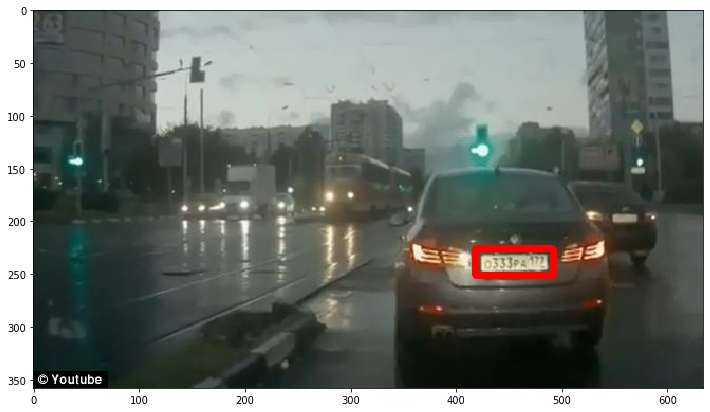

In [110]:
display(result)

# Both Detecting and Blurring License Plates

In [111]:
def detect_and_blur_plate(img):
    img_copy = img.copy()
    plate_rect = license_plate.detectMultiScale(img_copy,scaleFactor =1.2,minNeighbors = 5)
    for  i  in plate_rect:
        plate = img[i[1]:i[1]+i[3],i[0]:i[0]+i[2]]
        blur = cv2.medianBlur(plate,11)
        img_copy[i[1]:i[1]+i[3],i[0]:i[0]+i[2]] = blur
        
    return img_copy


In [112]:
result = detect_and_blur_plate(img)

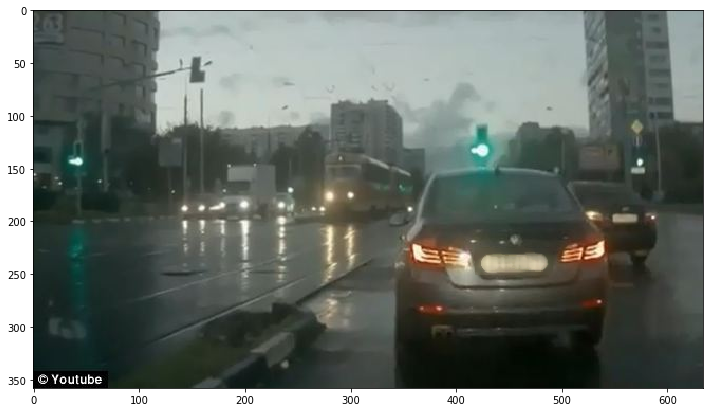

In [113]:
display(result)

# Examples

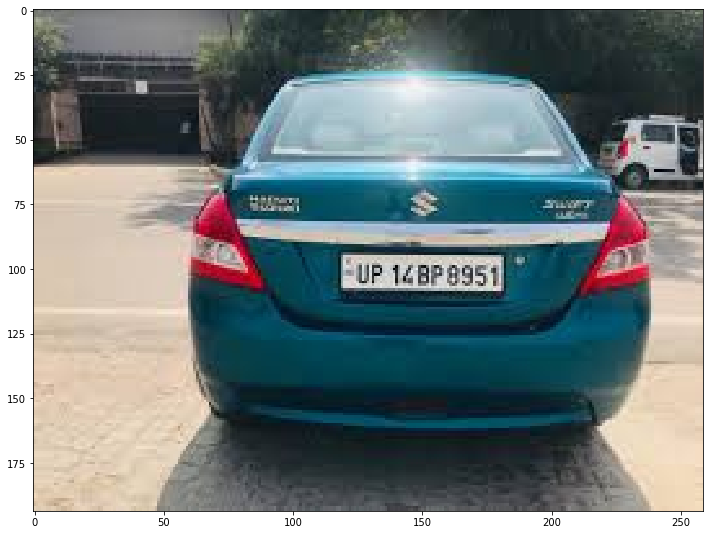

In [121]:
img2 = cv2.imread('car2.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
result = detect_and_blur_plate(img2)
display(img2)